In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_set = pd.read_csv('diabetes.csv')
print(data_set.columns)    
print(data_set.head())
print(type(data_set))
print("rows,columns = {}".format(data_set.shape))

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
rows,columns = (768, 9)


In [3]:
# Number of diabetes and non diabetes 
data_set.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

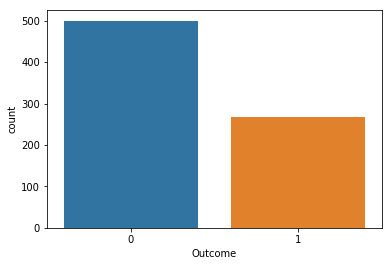

In [4]:
sns.countplot(data_set['Outcome'], label = 'Count')

In [8]:
# Checking for null
data_set.isnull().values.any()

False

In [9]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Stratified random sampling

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_set.iloc[:,0:7],data_set.iloc[:,8],
                                                   stratify = data_set.iloc[:,8], random_state = 1)
print("X_train shape = "+ str(X_train.shape))
print("X_test shape = "+ str(X_test.shape))
print("Y_train shape = "+ str(Y_train.shape))
print("Y_test shape = "+ str(Y_test.shape))


X_train shape = (576, 7)
X_test shape = (192, 7)
Y_train shape = (576,)
Y_test shape = (192,)


In [11]:
# Re-scaling the data so that all featurs are approximately on the same scale

from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.fit_transform(X_test)


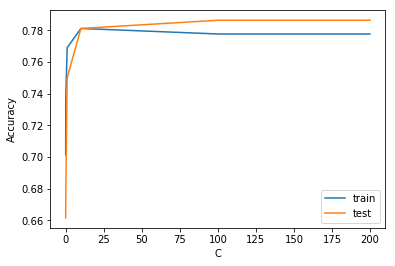

In [14]:
# Logistic Regression

c = [0.01,0.1,1,10,100,150,200]
train_accuracy_logit = []
test_accuracy_logit = []
for i in c:
    Logit_model = LogisticRegression(C=i).fit(X_train,Y_train)
    train_accuracy_logit.append(Logit_model.score(X_train,Y_train))
    test_accuracy_logit.append(Logit_model.score(X_test, Y_test))

plt.plot(c, train_accuracy_logit, label = 'train')
plt.plot(c, test_accuracy_logit, label = 'test')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend()
plt.savefig('Logit')
    

In [13]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

Logit_model = LogisticRegression(C=150).fit(X_train,Y_train) # C
print("Training accuracy for Logistic regression = {}".format(Logit_model.score(X_train,Y_train)))
print("Test accuracy for Logistic regression = {}".format(Logit_model.score(X_test,Y_test)))

Training accuracy for Logistic regression = 0.7777777777777778
Test accuracy for Logistic regression = 0.7864583333333334


In [15]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

train_accuracy = []
test_accuracy = []
no_clusters = np.arange(1,20)

for i in no_clusters:
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train,Y_train)
    train_accuracy.append(knn_model.score(X_train,Y_train))
    test_accuracy.append(knn_model.score(X_test, Y_test))
    

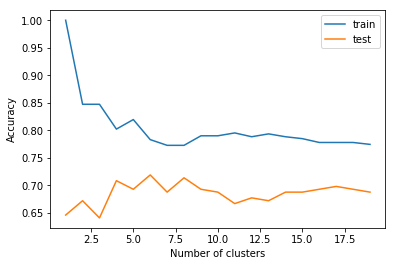

In [16]:
# Finding the number of clusters

plt.plot(no_clusters, train_accuracy, label = 'train')
plt.plot(no_clusters, test_accuracy, label = 'test')
plt.ylabel('Accuracy')
plt.xlabel('Number of clusters')
plt.legend()
plt.savefig('Knn')

In [17]:
# from the plot above the max test accuracy is for n = 6

knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(X_train,Y_train)
print("Training accuracy for KNN = {}".format(knn_model.score(X_train,Y_train)))
print("Test accuracy for KNN = {}".format(knn_model.score(X_test,Y_test)))


Training accuracy for KNN = 0.7829861111111112
Test accuracy for KNN = 0.71875


In [18]:
# Model using the scaled data

knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(X_train_s,Y_train)
print("Training accuracy for KNN = {}".format(knn_model.score(X_train_s,Y_train)))
print("Test accuracy for KNN = {}".format(knn_model.score(X_test_s,Y_test)))

# Training accuracy increased but test accuracy decreased 

Training accuracy for KNN = 0.8003472222222222
Test accuracy for KNN = 0.6770833333333334


In [26]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X_train,Y_train)
print("Training accuracy for Decision Tree = {}".format(tree.score(X_train,Y_train)))
print("Test accuracy for Decision Tree = {}".format(tree.score(X_test,Y_test)))

# as training accuracy is 1 and test is low that means the tree is over-fitted

Training accuracy for Decision Tree = 1.0
Test accuracy for Decision Tree = 0.6927083333333334


In [27]:
# Pre-pruning

depth = [1,2,3,4,5]
train_accuracy_tree = []
test_accuracy_tree = []
for i in depth:
    tree = DecisionTreeClassifier(max_depth = i,random_state = 1)
    tree.fit(X_train,Y_train)
    train_accuracy_tree.append(tree.score(X_train,Y_train))
    test_accuracy_tree.append(tree.score(X_test, Y_test))
    

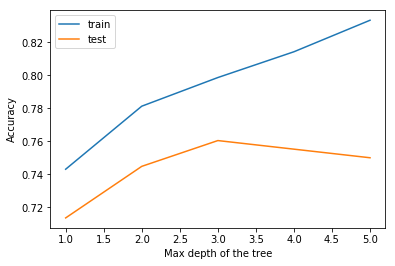

In [72]:
# Finding the number of clusters

plt.plot(depth, train_accuracy_tree, label = 'train')
plt.plot(depth, test_accuracy_tree, label = 'test')
plt.ylabel('Accuracy')
plt.xlabel('Max depth of the tree')
plt.legend()
plt.savefig('tree')

# at max_depth 3 we have max test accuracy

In [28]:
tree = DecisionTreeClassifier(max_depth = 3,random_state = 1)
tree.fit(X_train,Y_train)
print("Training accuracy for Decision Tree = {}".format(tree.score(X_train,Y_train)))
print("Test accuracy for Decision Tree = {}".format(tree.score(X_test,Y_test)))


Training accuracy for Decision Tree = 0.7986111111111112
Test accuracy for Decision Tree = 0.7604166666666666


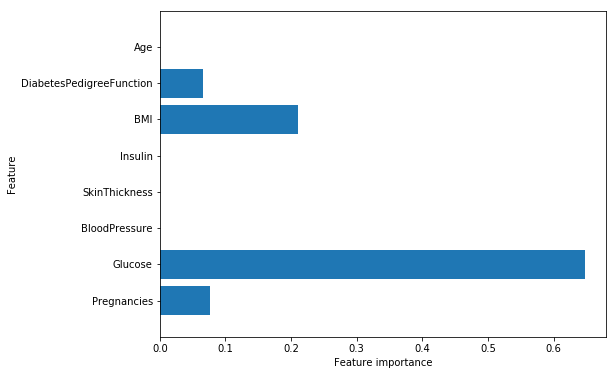

In [84]:
# Feature impotence
diabetes_features = [x for i,x in enumerate(data_set.columns) if i!=8]

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features-1), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

    
plot_feature_importances_diabetes(tree)
plt.savefig('Tree_feature_imp')


In [32]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

Rand_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
Rand_forest.fit(X_train,Y_train)
print("Training accuracy for Decision Tree = {}".format(Rand_forest.score(X_train,Y_train)))
print("Test accuracy for Decision Tree = {}".format(Rand_forest.score(X_test,Y_test)))


Training accuracy for Decision Tree = 1.0
Test accuracy for Decision Tree = 0.7135416666666666


In [40]:
# Overfitting

Rand_forest_1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state = 1 )
Rand_forest_1.fit(X_train, Y_train)
print("Training accuracy for Decision Tree = {}".format(Rand_forest_1.score(X_train,Y_train)))
print("Test accuracy for Decision Tree = {}".format(Rand_forest_1.score(X_test,Y_test)))

Training accuracy for Decision Tree = 0.8055555555555556
Test accuracy for Decision Tree = 0.7291666666666666


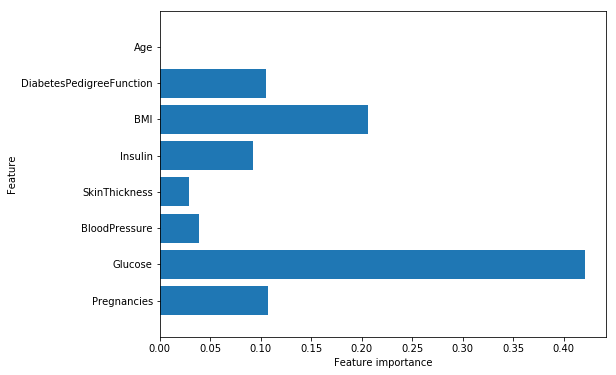

In [85]:
# plotting feature importance
plot_feature_importances_diabetes(Rand_forest_1)

In [43]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, Y_train)
print("Training accuracy for Decision Tree = {}".format(gb.score(X_train,Y_train)))
print("Test accuracy for Decision Tree = {}".format(gb.score(X_test,Y_test)))

Training accuracy for Decision Tree = 0.9166666666666666
Test accuracy for Decision Tree = 0.7395833333333334


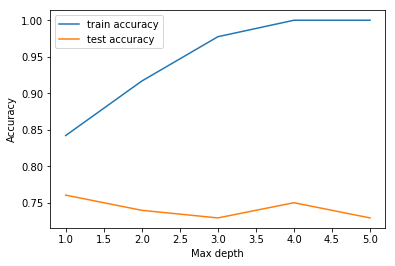

In [63]:
max_depth = [1,2,3,4,5]
test_accuracy_gb1 = []
train_accuracy_gb1 = []
    
for i in max_depth:
    gb1 = GradientBoostingClassifier(random_state=0, max_depth=i+1)
    gb1.fit(X_train, Y_train)
    train_accuracy_gb1.append(gb1.score(X_train, Y_train))
    test_accuracy_gb1.append(gb1.score(X_test, Y_test))

plt.plot(max_depth,train_accuracy_gb1, label = "train accuracy")
plt.plot(max_depth,test_accuracy_gb1, label = "test accuracy")
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.savefig('Gradent Boosting')

# max_depth = 1

In [74]:
# SVM

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
print("Training accuracy for Decision Tree = {}".format(gb.score(X_train,Y_train)))
print("Test accuracy for Decision Tree = {}".format(gb.score(X_test,Y_test)))

Training accuracy for Decision Tree = 0.9166666666666666
Test accuracy for Decision Tree = 0.7395833333333334


In [72]:
# As SVM works better with scalling
svc = SVC()
svc.fit(X_train_s, Y_train)
print("Training accuracy for Decision Tree = {}".format(gb.score(X_train_s,Y_train)))
print("Test accuracy for Decision Tree = {}".format(gb.score(X_test_s,Y_test)))

Training accuracy for Decision Tree = 0.6510416666666666
Test accuracy for Decision Tree = 0.6510416666666666


In [76]:
# Deep Learning
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, Y_train)
print("Training accuracy for Decision Tree = {}".format(mlp.score(X_train,Y_train)))
print("Test accuracy for Decision Tree = {}".format(mlp.score(X_test,Y_test)))

Training accuracy for Decision Tree = 0.3402777777777778
Test accuracy for Decision Tree = 0.421875


In [77]:
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train_s, Y_train)
print("Training accuracy for Decision Tree = {}".format(mlp.score(X_train_s,Y_train)))
print("Test accuracy for Decision Tree = {}".format(mlp.score(X_test_s,Y_test)))

Training accuracy for Decision Tree = 0.78125
Test accuracy for Decision Tree = 0.7552083333333334


C:\Users\Prudhvinath\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Prudhvinath\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


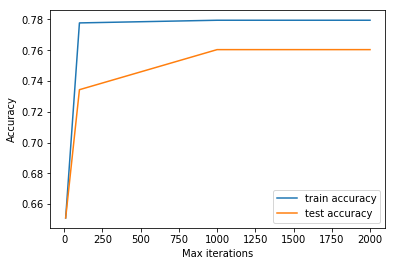

In [80]:
max_iteration = [10,100,1000,2000]
test_accuracy_mlp = []
train_accuracy_mlp = []

for i in max_iteration:
    mlp = MLPClassifier(max_iter = i, random_state=1)
    mlp.fit(X_train_s, Y_train)
    train_accuracy_mlp.append(mlp.score(X_train_s, Y_train))
    test_accuracy_mlp.append(mlp.score(X_test_s, Y_test))

plt.plot(max_iteration,train_accuracy_mlp, label = "train accuracy")
plt.plot(max_iteration,test_accuracy_mlp, label = "test accuracy")
plt.legend()
plt.xlabel('Max iterations')
plt.ylabel('Accuracy')
plt.savefig('MLP')
